In [ ]:
! pip install rasterio boto3 pystac_client stacchip

In [ ]:
import random

import pystac_client
from stacchip.indexer import NoStatsChipIndexer
from stacchip.chipper import Chipper
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Optimize GDAL settings for cloud optimized reading
os.environ["GDAL_DISABLE_READDIR_ON_OPEN"] = "EMPTY_DIR"
os.environ["AWS_REQUEST_PAYER"] = "requester"

# Query STAC catalog for NAIP data
catalog = pystac_client.Client.open("https://earth-search.aws.element84.com/v1")


items = catalog.search(
    collections=["sentinel-2-l2a"],
    query=["eo:cloud_cover<10"],
    max_items=10,
)

items = items.item_collection()

items

In [ ]:
items[0].assets

{'aot': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/47/L/NF/2024/9/S2B_47LNF_20240909_0_L2A/AOT.tif>,
 'blue': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/47/L/NF/2024/9/S2B_47LNF_20240909_0_L2A/B02.tif>,
 'coastal': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/47/L/NF/2024/9/S2B_47LNF_20240909_0_L2A/B01.tif>,
 'granule_metadata': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/47/L/NF/2024/9/S2B_47LNF_20240909_0_L2A/granule_metadata.xml>,
 'green': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/47/L/NF/2024/9/S2B_47LNF_20240909_0_L2A/B03.tif>,
 'nir': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/47/L/NF/2024/9/S2B_47LNF_20240909_0_L2A/B08.tif>,
 'nir08': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/47/L/NF/2024/9/S2B_47LNF_20240909_0

In [ ]:
# Get image data
items_list = list(items)
random.shuffle(items_list)

chips = []
for item in items_list[:10]:
    print(f"Working on {item}")

    # Index the chips in the item
    indexer = NoStatsChipIndexer(item, chip_size=60)

    # Instanciate the chipper
    chipper = Chipper(indexer, assets=["red", "green", "blue"])

    # Get first chip for the "image" asset key
    for chip_id in random.sample(range(0, len(chipper)), 5):
        x_index, y_index, chip = chipper[chip_id]
        chips.append([chip["red"], chip["green"], chip["blue"]])


Working on <Item id=S2B_49TGN_20240909_0_L2A>
Working on <Item id=S2B_49TDL_20240909_0_L2A>
Working on <Item id=S2B_49TEN_20240909_0_L2A>
Working on <Item id=S2B_49TEM_20240909_0_L2A>
Working on <Item id=S2B_49TFN_20240909_0_L2A>
Working on <Item id=S2B_48NUM_20240909_0_L2A>
Working on <Item id=S2B_47LNF_20240909_0_L2A>
Working on <Item id=S2B_49TDM_20240909_0_L2A>
Working on <Item id=S2B_49TDN_20240909_0_L2A>
Working on <Item id=S2B_47LLH_20240909_0_L2A>


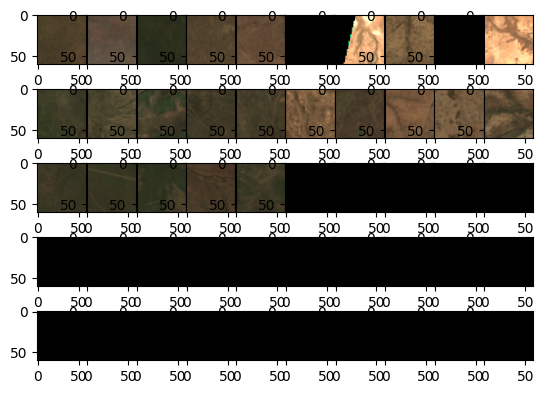

In [ ]:

# Visualize the data

fig, axs = plt.subplots(5, 10, gridspec_kw={'wspace': 0.01, 'hspace': 0.01}, squeeze=True)

for idx, ax in enumerate(axs.flatten()):
    chip = chips[idx]

    img = np.clip(np.array(chip[:3]).squeeze().swapaxes(0, 1).swapaxes(1, 2), 0, 3000) / 3000
    ax.imshow(img)

plt.show()
